# Calculations of $g^{(2)}(\omega_1,\omega_2)$ for a squeezed laser

In [1]:
from qutip import *
import numpy as np
from numpy import sqrt
import time
import matplotlib.pyplot as plt

from TPS_simulation import *
from tqdm import tqdm

#from functions import *

Definition of parameters

In [2]:
g = 1
ratio = 0.01
C = 1.
P = sqrt(4/(C*ratio))
kappa = ratio*P
gsens = 0.0001
Gamma = 0.01

# Squeezing parameter
r = 0.4

# Truncation parameter
Ncav = 30

In [3]:
sim = simulation()

Delta1 = -0.1; Delta2 = 0.1;
DeltaPair = [Delta1,Delta2]

# Test
#sim.g2g1(DeltaPair,g,gsens,kappa,P,Gamma,r)

In [4]:
wgrid = np.linspace(-.05,0.05,5)
DeltaList=list(zip(wgrid,-wgrid))

In [5]:
r=0.4
g2Antidiag = np.array([sim.g2g1(DeltaPair,g,gsens,kappa,P,Gamma,r) for DeltaPair in tqdm(DeltaList)])

100%|██████████| 5/5 [00:50<00:00, 10.07s/it]


In [7]:
r=0.4
g2Antidiag_Parallel = np.array(parallel_map(sim.g2g1,DeltaList,(g,gsens,kappa,P,Gamma,r) ))

In [8]:
g2Antidiag_r0 = np.array([sim.g2g1(DeltaPair,g,gsens,kappa,P,Gamma,r=0) for DeltaPair in tqdm(DeltaList)])

100%|██████████| 30/30 [04:22<00:00,  8.76s/it]


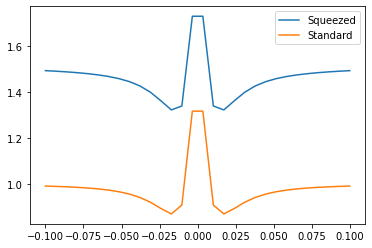

In [10]:
plt.plot(wgrid,g2Antidiag,label="Squeezed")
plt.plot(wgrid,g2Antidiag_r0,label="Standard")
plt.legend()
plt.show()